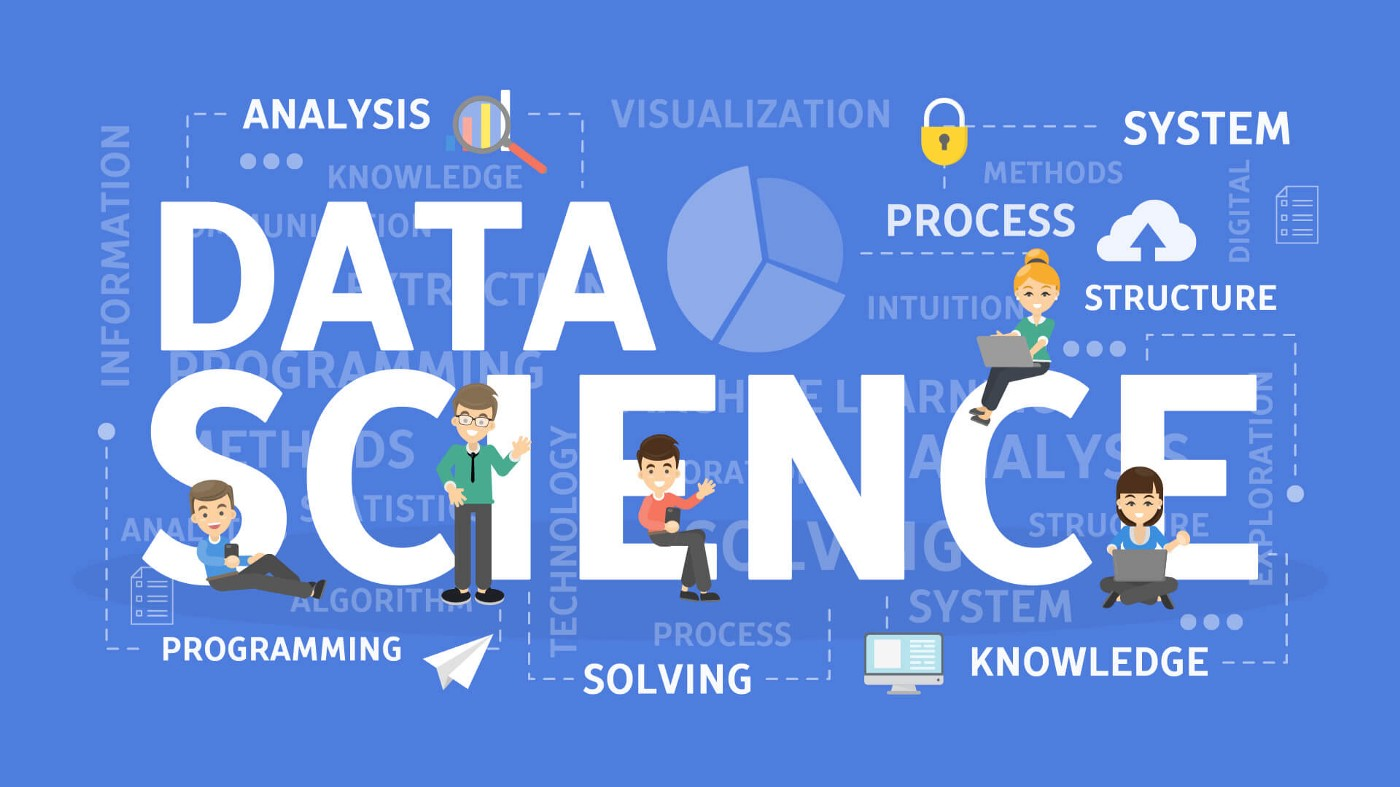

## <p style="font-family:newtimeroman; margin-bottom:2px; font-size:24px; color: SlateBlue">Motivation</p>  

<p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">The first of the ultimate goals in this notebook is to visualize jobs in data science, the ratio of remote work, level of experience, the size of the firm in the market, the location of the employee and the firm, thereby revealing an insight. For this purpose, scatter and box diagrams were created. In addition, the location of the firm and employees was provided to be expressed on a continental basis. A more organised environment has been achieved by grouping many job titles under the "job type" variable. Moreover, it will be determined how many of the employees receive a salary in the currency of their home country.</p>

<p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">The secondary ultimate goal is to emphasize the fundamentals of ANOVA, which is one of the important statistical techniques. Some basic ANOVA applications will be made regarding this and the difference in means between groups will be tested.</p>

## <p style="background-color:#3a2c57; font-family:newtimeroman; margin-bottom:2px; font-size:32px; color: white; text-align:center">Table of Content</p>  

<a id="table-of-contents"></a>
1. [Preperation](#preperation)
    * 1.1. [Loading Packages and Importing Libraries](#load_packages_import_libraries)
    * 1.2. [Data Description](#data_description)
2. [Dataset Pre-processing](#data_preprocessing)
3. [Exploratory Data Analysis](#eda)
4. [Statistical Analysis](#stats)
    * 4.1. [Normality Check](#normality)
    * 4.2. [ANOVA](#anova)
        * 4.2.1. [Two-Way ANOVA](#two_way_anova)
        * 4.2.2. [Variance Homogenity](#variance)
        * 4.2.3. [Post-Hoc Tests](#post_hoc)
        * 4.2.4. [Welch ANOVA](#welch_anova)
        * 4.2.5. [Kruskal-Wallis Test](#kruskal_wallis)


[back to top](#table-of-contents)
<a id="preperation"></a>
# <p style="background-color:#3a2c57; font-family:newtimeroman; font-size:150%; text-align:center">1. Preperation</p>


<a id="load_packages_import_libraries"></a>
## <p style="background-color:#664e99; font-family:newtimeroman; font-size:120%; text-align:center">1.1. Loading Packages and Importing Libraries</p>

<p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">Loading packages and importing some helpful libraries.</p>

In [64]:
!pip install simple-colors

In [65]:
!pip install pingouin

In [66]:
!pip install scikit-posthocs

In [67]:
import numpy as np
import pandas as pd
from simple_colors import *
from termcolor import colored

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import seaborn as sns

from scipy import stats
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import levene

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.gofplots import qqplot

import scikit_posthocs as sp

import pingouin as pg

import warnings
warnings.filterwarnings("ignore")



<a id="data_description"></a>
## <p style="background-color:#664e99; font-family:newtimeroman; font-size:120%; text-align:center">1.2. Data Description</p>

In [68]:
#Setting up options

pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", None)
pd.options.display.float_format = "{:,.3f}".format

In [69]:
# Load the data

data = pd.read_csv('C:/Users/User/Downloads/ds_salaries.csv', index_col = 0)

In [70]:
data = data.astype({"work_year": str, "remote_ratio": str})

In [71]:
def data_desc(df):
    
    """
    This function helps us with simple data analysis.
    We may explore the common information about the dataset, missing values, features distribution and duplicated rows
    """
    
    # applying info() method
    print('*******************')
    print(cyan('General information of this dataset', 'bold'))
    print('*******************\n')
    print(df.info())
    
    print('\n*******************')
    print(cyan('Number of rows and columns', 'bold'))
    print('*******************\n')
    print("Number of rows:", colored(df.shape[0], 'green', attrs=['bold']))
    print("Number of columns:", colored(df.shape[1], 'green', attrs=['bold']))
    
    # missing values
    print('\n*******************')
    print(cyan('Missing value checking', 'bold'))
    print('*******************\n')
    if df.isna().sum().sum() == 0:
        print(colored('There are no missing values', 'green'))
        print('*******************')
    else:
        print(colored('Missing value detected!', 'green', attrs=['bold']))
        print("\nTotal number of missing values:", colored(sum(df.isna().sum()), 'green', attrs=['bold']))
        
        print('\n*******************')
        print(cyan('Missing values of features', 'bold'))
        print('*******************\n')
        display(df.isna().sum().sort_values(ascending = False).to_frame().rename({0:'Counts'}, axis = 1).T.style.background_gradient('Purples', axis = None))
        print('\n*******************')
        print(cyan('Percentage of missing values of features', 'bold'))
        print('*******************\n')
        display(round((df.isnull().sum() / (len(df.index)) * 100) , 3).sort_values(ascending = False).to_frame().rename({0:'%'}, axis = 1).T.style.background_gradient('PuBuGn', axis = None))

        
    # applying describe() method for categorical features
    cat_feats = [col for col in df.columns if 'object' in str(df[col].dtype) or df[col].nunique() <= 3]
    print('\n*******************')
    print(cyan('Categorical columns', 'bold'))
    print('*******************\n')
    print("Total categorical (binary) features:", colored(len(cat_feats), 'green', attrs=['bold']))
    display(df[cat_feats].describe())
        
        
    # describe() for numerical features
    cont_feats = [col for col in df.columns if 'int' in str(df[col].dtype) and df[col].nunique() > 3]
    print('\n*******************')
    print(cyan('Numerical columns', 'bold'))
    print('*******************\n')
    print("Total numerical features:", colored(len(cont_feats), 'green', attrs=['bold']))
    ##df = df[df.columns.difference(['id', 'claim'], sort = False)]
    display(df[cont_feats].describe())
    
    # Checking for duplicated rows -if any-
    if df.duplicated().sum() == 0:
        print('\n*******************')
        print(colored('There are no duplicates!', 'green', attrs=['bold']))
        print('*******************')
    else:
        print('\n*******************')
        print(colored('Duplicates found!', 'green', attrs=['bold']))
        print('*******************')
        display(df[df.duplicated()])

    print('\n*******************')
    print(cyan('Preview of the data - Top 10 rows', 'bold'))
    print('*******************\n')
    display(df.head(10))
    print('*******************\n')
    
    print('\n*******************')
    print(cyan('End of the report', 'bold'))

In [72]:
data_desc(data)

*******************
General information of this dataset
*******************

<class 'pandas.core.frame.DataFrame'>
Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    object
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    object
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(2), object(9)
memory usage: 56.9+ KB
None

*******************
Number of rows and columns
*******************

Number of rows: 607
Number of columns: 11

*******************
Missing val

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
count,607,607,607,607,607,607,607,607,607
unique,3,4,4,50,17,57,3,50,3
top,2022,SE,FT,Data Scientist,USD,US,100,US,M
freq,318,280,588,143,398,332,381,355,326



*******************
Numerical columns
*******************

Total numerical features: 2


,salary,salary_in_usd
count,607.000,607.000
mean,"324,000.063","112,297.870"
std,"1,544,357.487","70,957.259"
min,"4,000.000","2,859.000"
25%,"70,000.000","62,726.000"
50%,"115,000.000","101,570.000"
75%,"165,000.000","150,000.000"
max,"30,400,000.000","600,000.000"



*******************
Duplicates found!
*******************


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
217,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L
256,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
331,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
332,2022,SE,FT,Data Analyst,112900,USD,112900,US,100,US,M
333,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
353,2022,SE,FT,Data Scientist,123000,USD,123000,US,100,US,M
362,2022,SE,FT,Data Analyst,130000,USD,130000,CA,100,CA,M
363,2022,SE,FT,Data Analyst,61300,USD,61300,CA,100,CA,M
370,2022,SE,FT,Data Scientist,123000,USD,123000,US,100,US,M
374,2022,MI,FT,ETL Developer,50000,EUR,54957,GR,0,GR,M



*******************
Preview of the data - Top 10 rows
*******************



,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


*******************


*******************
End of the report


[back to top](#table-of-contents)
<a id="data_preprocessing"></a>
# <p style="background-color:#3a2c57; font-family:newtimeroman; font-size:150%; text-align:center">2. Dataset Pre-processing</p>

<p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">In this section, some expressions given in the data set are written in full. For example, the groups named EN, MI, SE, EX, which are the values of the experience level variable, are expressed as Entry-level, Mid-level, Senior-level, Executive-level, respectively.</p>

In [73]:
data['remote_ratio'].replace(['100', '50', '0'], ['Remote', 'Hybrid' ,'On-site'], inplace = True)
data['experience_level'].replace(['EN', 'MI', 'SE', 'EX'], ['Entry-level', 'Mid-level', 'Senior-level', 'Executive-level'], inplace = True)
data['employment_type'].replace(['FT', 'PT', 'CT', 'FL'], ['Full-time', 'Part-time', 'Contract', 'Freelance'], inplace = True)
data['company_size'].replace(['L', 'M', 'S'], ['Large', 'Medium', 'Small'], inplace = True)

In [74]:
##Mapping country currencies

country_currency = {
	'DE': 'EUR',
	'JP': 'JPY',
	'GB': 'GBP',
	'HN': 'HNL',
	'US': 'USD',
	'HU': 'HUF',
    'NZ': 'NZD',
    'FR': 'EUR', 
    'IN': 'INR',
    'PK': 'PKR',
    'PL': 'PLN',
    'PT': 'EUR',
    'CN': 'CNY',
    'GR': 'EUR',
    'AE': 'AED',
    'NL': 'EUR',
    'MX': 'MXN',
    'CA': 'CAD',
    'AT': 'EUR',
    'NG': 'NGN',
    'PH': 'PHP',
    'ES': 'EUR',
    'DK': 'DKK',
    'RU': 'RUB',
    'IT': 'EUR',
    'HR': 'HRK',
    'BG': 'BGN',
    'SG': 'SGD',
    'BR': 'BRL',
    'IQ': 'IQD',
    'VN': 'VND',
    'BE': 'EUR',
    'UA': 'UAH',
    'MT': 'EUR',
    'CL': 'CLP',
    'RO': 'RON',
    'IR': 'IRR',
    'CO': 'COP',
    'MD': 'MDL',
    'KE': 'KES',
    'SI': 'SIT',
    'HK': 'HKD',
    'TR': 'TRY',
    'RS': 'RSD',
    'PR': 'USD',
    'LU': 'EUR',
    'JE': 'GBP',
    'CZ': 'CZK',
    'AR': 'ARS',
    'DZ': 'DZD',
    'TN': 'TND',
    'MY': 'MYR',
    'EE': 'EUR',
    'AU': 'AUD',
    'BO': 'BOB',
    'IE': 'EUR',
    'CH': 'CHF'
}

data['employee_residence_currency'] = data['employee_residence'].map(country_currency)

<p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">In fact, the simple analysis of the 2 cells below is critical. Because the fact that an employee earns a currency other than the currency of his/her country and this currency is a more valuable currency than the currency of his/her country indicates that the employee is probably living quite well.</p>


<p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">To give an example, there is a serious inflation and exchange rate problem in developing countries such as Brazil, Argentina and Turkey. As a person living in Turkey, I can say that someone who earns an annual salary of 150-180 thousand Turkish liras (TRY) in 2021 actually has a very good purchasing power and this salary corresponds to roughly 25000 USD in 2021. However, as a result of the mind-blowing inflation in recent months and the fantastic depreciation of the Turkish lira against the USD, currently 150000 TRY is equivalent to less than 8500 USD. Let's be honest: someone who received an annual salary of 150000 TRY last year still does not earn 150000 TRY. But, the raise she/he received would bring the salary of the relevant employee around 250000 TRY, which is equal to 14000 USD today. If this employee had been paid directly in USD from the very beginning, she/he would have been earning around 25000 USD per year in 2021 and around 30000 USD in 2022 with the possible increase. Even if she/he did not receive a raise and his salary remained stable, 25000 USD is currently equivalent to 532000 TRY.</p>


<p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">In short, if there were many employees in the data set in the situation I described above, it would be both critical and necessary to think about it and also to analyze it. Yet, we skip this because there is not much data in the dataset to represent this situation. Still, it is important to me to be aware of such a situation.</p>

In [75]:
data['salary_comparison'] = data['salary'] / data['salary_in_usd']

In [76]:
list_1 = data[(data.salary_currency == data.employee_residence_currency)].index.tolist()
data.loc[list_1, 'country_currency_salary'] = 'Yes'
data['country_currency_salary'].fillna('No', inplace=True)

list_2= data[(data.employee_residence == data.company_location)].index.tolist()
data.loc[list_2, 'home_country'] = 'Yes'
data['home_country'].fillna('No', inplace=True)

[back to top](#table-of-contents)
<a id="eda"></a>
# <p style="background-color:#3a2c57; font-family:newtimeroman; font-size:150%; text-align:center">3. Exploratory Data Analysis</p>

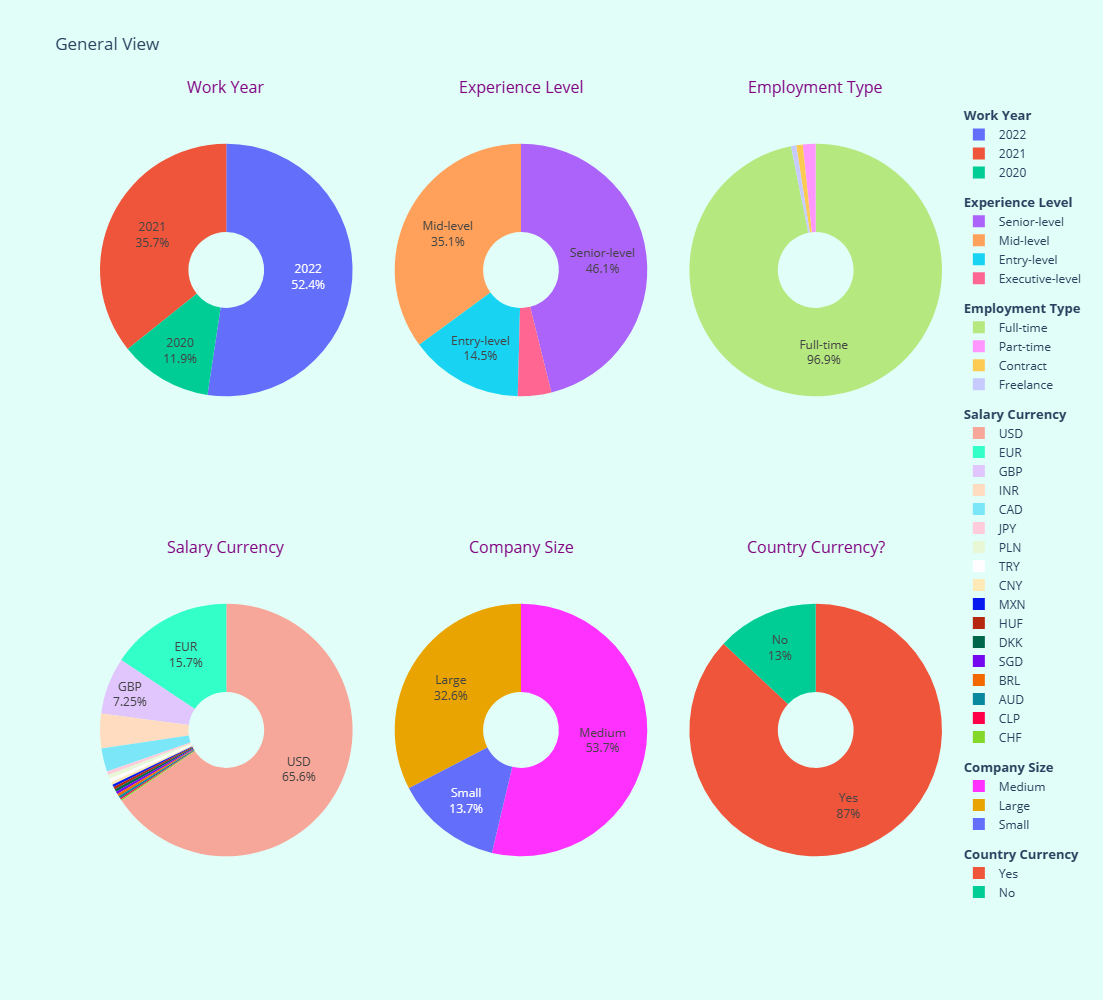

In [77]:
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=2, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}] ,[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]], 
                    subplot_titles=("Plot 1", "Plot 2", "Plot 3", "Plot 4", "Plot 5", "Plot 6"),
                    vertical_spacing = 0.15,
                    horizontal_spacing = 0.05)

fig.add_trace(go.Pie(labels=data['work_year'].value_counts().index, 
                     values=data['work_year'].value_counts().values,  
                     name="Work Year",
                     legendgroup="Work Year",
                     legendgrouptitle_text=f'<b>Work Year</b>'),
              1, 1)


fig.add_trace(go.Pie(labels=data['experience_level'].value_counts().index,
                     values= data['experience_level'].value_counts().values,
                     name="Experience Level",
                     legendgroup="Experience Level",
                     legendgrouptitle_text=f'<b>Experience Level</b>'),
              1, 2)

fig.add_trace(go.Pie(labels=data['employment_type'].value_counts().index,
                     values= data['employment_type'].value_counts().values,
                     name="Employment Type",
                     legendgroup="Employment Type",
                     legendgrouptitle_text=f'<b>Employment Type</b>'),
              1, 3)

fig.add_trace(go.Pie(labels=data['salary_currency'].value_counts().index, 
                     values=data['salary_currency'].value_counts().values,  
                     name="Salary Currency",
                     legendgroup="Salary Currency",
                     legendgrouptitle_text=f'<b>Salary Currency</b>'),
              2, 1)


fig.add_trace(go.Pie(labels=data['company_size'].value_counts().index,
                     values= data['company_size'].value_counts().values,
                     name="Company Size",
                     legendgroup="Company Size",
                     legendgrouptitle_text=f'<b>Company Size</b>'),
              2, 2)

fig.add_trace(go.Pie(labels=data['country_currency_salary'].value_counts().index,
                     values= data['country_currency_salary'].value_counts().values,
                     name="country_currency_salary",
                     legendgroup="Country Currency",
                     legendgrouptitle_text=f'<b>Country Currency</b>'),
              2, 3)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.30, textposition='inside', hoverinfo='percent+label+name', textinfo='percent+label')

fig.update_layout(
    title_text="General View",
    uniformtext_minsize = 10, 
    uniformtext_mode ='hide',
    height = 1000,
    margin={"l": 100, "r": 100, "t": 100, "b": 100},
    paper_bgcolor="rgb(225, 255, 248)"
    # Add annotations in the center of the donut pies.
    #annotations=[dict(text='GHG', x=0.21, y=0.5, font_size=20, showarrow=False),
                 #dict(text='CO2', x=0.79, y=0.5, font_size=20, showarrow=False)]
)

names = {'Plot 1':'Work Year', 'Plot 2':'Experience Level', 'Plot 3':'Employment Type', 'Plot 4':'Salary Currency', 'Plot 5':'Company Size', 'Plot 6':'Country Currency?'}

# fig.for_each_annotation(lambda a: a.update(text = names[a.text]))

fig.for_each_annotation(lambda a: a.update(text = names[a.text]))
fig.update_annotations(font_size=16, font_color = 'Purple')
fig.show()

<p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">Ratios based on years, experience level, employment type, salary currency, company size and local country currency are as above.</p>



In [78]:
##Mapping jobs by job types

job_mapping = {
	'Data Scientist': 'Scientist',
	'Machine Learning Scientist': 'Scientist',
	'Big Data Engineer': 'Engineer',
	'Product Data Analyst': 'Analyst',
	'Machine Learning Engineer': 'Engineer',
	'Data Analyst': 'Analyst',
    'Lead Data Scientist': 'Scientist',
    'Business Data Analyst': 'Analyst', 
    'Lead Data Engineer': 'Engineer',
    'Lead Data Analyst': 'Analyst',
    'Data Engineer': 'Engineer',
    'Data Science Consultant': 'Consultant',
    'BI Data Analyst': 'Analyst',
    'Director of Data Science': 'Manager',
    'Research Scientist': 'Scientist',
    'Machine Learning Manager': 'Manager',
    'Data Engineering Manager': 'Manager',
    'Machine Learning Infrastructure Engineer': 'Engineer',
    'ML Engineer': 'Engineer',
    'AI Scientist': 'Scientist',
    'Computer Vision Engineer': 'Engineer',
    'Principal Data Scientist': 'Scientist',
    'Data Science Manager': 'Manager',
    'Head of Data': 'Manager',
    '3D Computer Vision Researcher': 'Other',
    'Data Analytics Engineer': 'Engineer',
    'Applied Data Scientist': 'Scientist',
    'Marketing Data Analyst': 'Analyst',
    'Cloud Data Engineer': 'Engineer',
    'Financial Data Analyst': 'Analyst',
    'Computer Vision Software Engineer': 'Engineer',
    'Director of Data Engineering': 'Manager',
    'Data Science Engineer': 'Engineer',
    'Principal Data Engineer': 'Engineer',
    'Machine Learning Developer': 'Developer',
    'Applied Machine Learning Scientist': 'Scientist',
    'Data Analytics Manager': 'Manager',
    'Head of Data Science': 'Manager',
    'Data Specialist': 'Other',
    'Data Architect': 'Architect',
    'Finance Data Analyst': 'Analyst',
    'Principal Data Analyst': 'Analyst',
    'Big Data Architect': 'Architect',
    'Staff Data Scientist': 'Scientist',
    'Analytics Engineer': 'Engineer',
    'ETL Developer': 'Developer',
    'Head of Machine Learning': 'Manager',
    'NLP Engineer': 'Engineer',
    'Lead Machine Learning Engineer': 'Engineer',
    'Data Analytics Lead': 'Other',
}

data['job_type'] = data['job_title'].map(job_mapping)

In [79]:
##Mapping countries by continents

company_continent = {
	'DE': 'Europe',
	'JP': 'Asia',
	'GB': 'Europe',
	'HN': 'North America',
	'US': 'North America',
	'HU': 'Europe',
    'NZ': 'Oceania',
    'FR': 'Europe', 
    'IN': 'Asia',
    'PK': 'Asia',
    'CN': 'Asia',
    'GR': 'Europe',
    'AE': 'Asia',
    'NL': 'Europe',
    'MX': 'North America',
    'CA': 'North America',
    'AT': 'Europe',
    'NG': 'Africa',
    'ES': 'Europe',
    'PT': 'Europe',
    'DK': 'Europe',
    'IT': 'Europe',
    'HR': 'Europe',
    'LU': 'Europe',
    'PL': 'Europe',
    'SG': 'Asia',
    'RO': 'Europe',
    'IQ': 'Asia',
    'BR': 'South America',
    'BE': 'Europe',
    'UA': 'Europe',
    'IL': 'Asia',
    'RU': 'Europe',
    'MT': 'Europe',
    'CL': 'South America',
    'IR': 'Asia',
    'CO': 'South America',
    'MD': 'Europe',
    'KE': 'Africa',
    'SI': 'Europe',
    'CH': 'Europe',
    'VN': 'Asia',
    'AS': 'Oceania',
    'TR': 'Europe',
    'CZ': 'Europe',
    'DZ': 'Africa',
    'EE': 'Europe',
    'MY': 'Asia',
    'AU': 'Oceania',
    'IE': 'Europe',
    'PH': 'Asia',
    'BG': 'Europe',
    'HK': 'Asia',
    'RS': 'Europe',
    'PR': 'North America',
    'JE': 'Europe',
    'AR': 'South America',
    'TN': 'Africa',
    'BO': 'South America'
}

data['company_continent'] = data['company_location'].map(company_continent)
data['employee_continent'] = data['employee_residence'].map(company_continent)

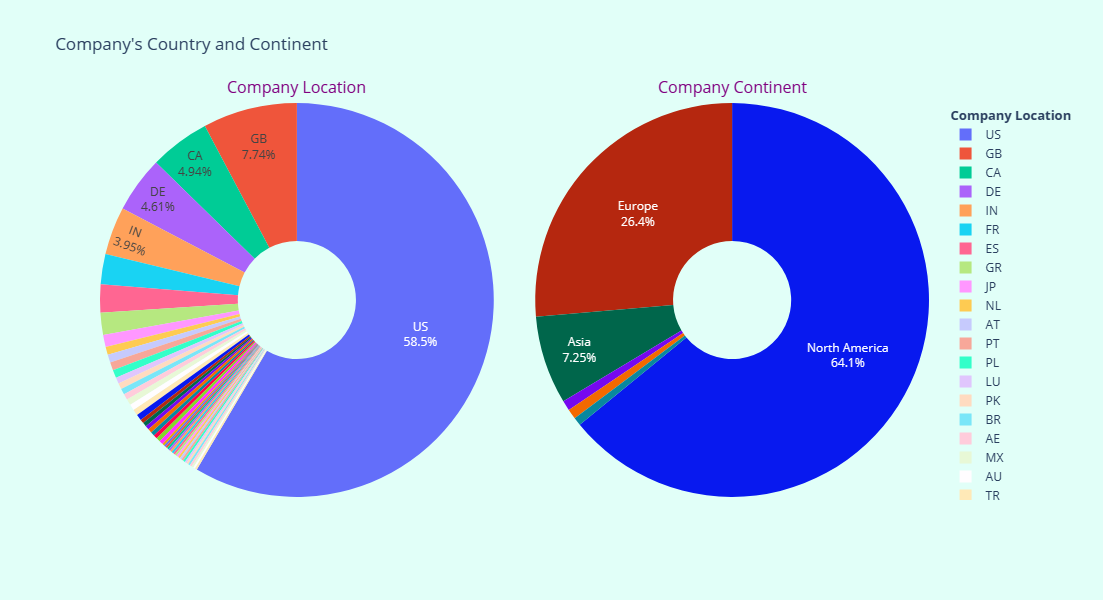

In [80]:
# Create subplots: use 'domain' type for Pie subplot

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], 
                    subplot_titles=("Plot 1", "Plot 2"),
                    vertical_spacing = 0.15,
                    horizontal_spacing = 0.05)

fig.add_trace(go.Pie(labels=data['company_location'].value_counts().index, 
                     values=data['company_location'].value_counts().values,  
                     name="Company Location",
                     legendgroup="Company Location",
                     legendgrouptitle_text=f'<b>Company Location</b>'),
              1, 1)


fig.add_trace(go.Pie(labels=data['company_continent'].value_counts().index,
                     values= data['company_continent'].value_counts().values,
                     name="Company Continent",
                     legendgroup="Company Continent",
                     legendgrouptitle_text=f'<b>Company Continent</b>'),
              1, 2)


# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.30, textposition='inside', hoverinfo='percent+label+name', textinfo='percent+label')

fig.update_layout(
    title_text="Company's Country and Continent",
    uniformtext_minsize = 10, 
    uniformtext_mode ='hide',
    height = 600,
    margin={"l": 100, "r": 100, "t": 100, "b": 100},
    paper_bgcolor="rgb(225, 255, 248)"
    # Add annotations in the center of the donut pies.
    #annotations=[dict(text='GHG', x=0.21, y=0.5, font_size=20, showarrow=False),
                 #dict(text='CO2', x=0.79, y=0.5, font_size=20, showarrow=False)]
)

names = {'Plot 1':'Company Location', 'Plot 2':'Company Continent'}

# fig.for_each_annotation(lambda a: a.update(text = names[a.text]))

fig.for_each_annotation(lambda a: a.update(text = names[a.text]))
fig.update_annotations(font_size=16, font_color = 'Purple')
fig.show()

<p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">Countries and their continents. North America is in the first place by the weight of the USA.</p>



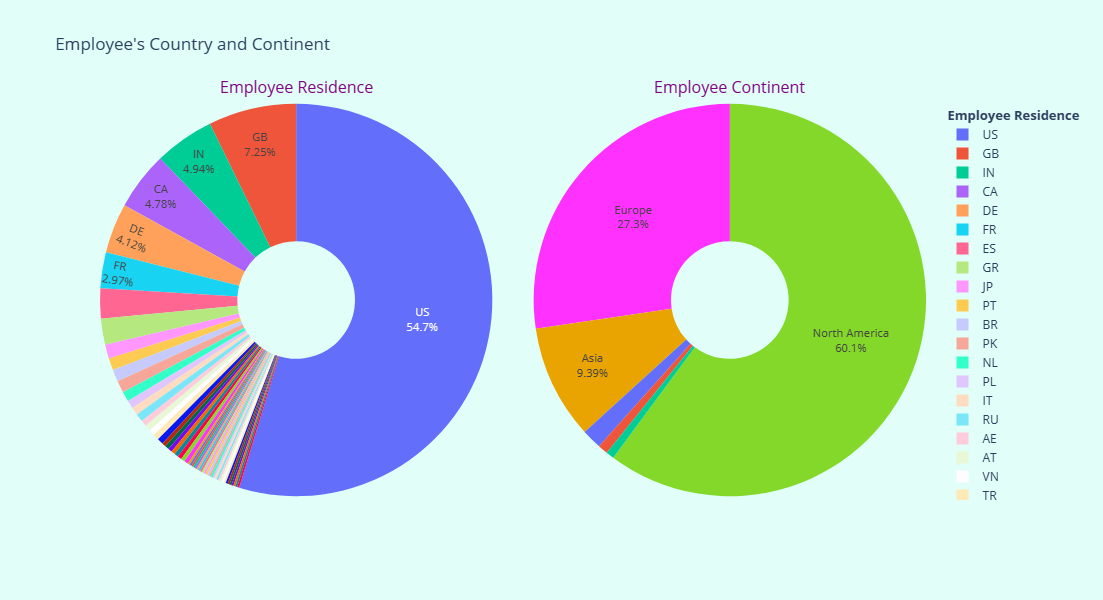

In [81]:
# Create subplots: use 'domain' type for Pie subplot

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], 
                    subplot_titles=("Plot 1", "Plot 2"),
                    vertical_spacing = 0.15,
                    horizontal_spacing = 0.05)

fig.add_trace(go.Pie(labels=data['employee_residence'].value_counts().index, 
                     values=data['employee_residence'].value_counts().values,  
                     name="Employee Residence",
                     legendgroup="Employee Residence",
                     legendgrouptitle_text=f'<b>Employee Residence</b>'),
              1, 1)


fig.add_trace(go.Pie(labels=data['employee_continent'].value_counts().index,
                     values= data['employee_continent'].value_counts().values,
                     name="Employee Continent",
                     legendgroup="Employee Continent",
                     legendgrouptitle_text=f'<b>Employee Continent</b>'),
              1, 2)


# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.30, textposition='inside', hoverinfo='percent+label+name', textinfo='percent+label')

fig.update_layout(
    title_text="Employee's Country and Continent",
    uniformtext_minsize = 10, 
    uniformtext_mode ='hide',
    height = 600,
    margin={"l": 100, "r": 100, "t": 100, "b": 100},
    paper_bgcolor="rgb(225, 255, 248)"
    # Add annotations in the center of the donut pies.
    #annotations=[dict(text='GHG', x=0.21, y=0.5, font_size=20, showarrow=False),
                 #dict(text='CO2', x=0.79, y=0.5, font_size=20, showarrow=False)]
)

names = {'Plot 1':'Employee Residence', 'Plot 2':'Employee Continent'}

# fig.for_each_annotation(lambda a: a.update(text = names[a.text]))

fig.for_each_annotation(lambda a: a.update(text = names[a.text]))
fig.update_annotations(font_size=16, font_color = 'Purple')
fig.show()

<p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">Countries where employees are located, and continents where countries are located. The situation in companies is very similar here.</p>



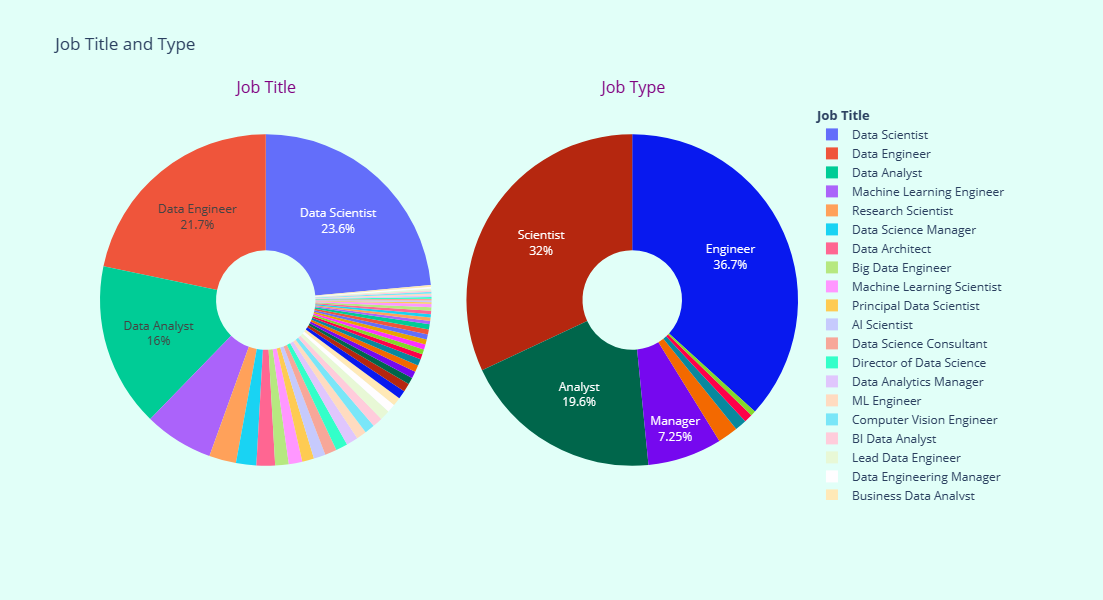

In [82]:
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], 
                    subplot_titles=("Plot 1", "Plot 2"),
                    vertical_spacing = 0.15,
                    horizontal_spacing = 0.05)

fig.add_trace(go.Pie(labels=data['job_title'].value_counts().index, 
                     values=data['job_title'].value_counts().values,  
                     name="Job Title",
                     legendgroup="Job Title",
                     legendgrouptitle_text=f'<b>Job Title</b>'),
              1, 1)


fig.add_trace(go.Pie(labels=data['job_type'].value_counts().index,
                     values= data['job_type'].value_counts().values,
                     name="Job Type",
                     legendgroup="Job Type",
                     legendgrouptitle_text=f'<b>Job Type</b>'),
              1, 2)


# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.30, textposition='inside', hoverinfo='percent+label+name', textinfo='percent+label')

fig.update_layout(
    title_text="Job Title and Type",
    uniformtext_minsize = 10, 
    uniformtext_mode ='hide',
    height = 600,
    margin={"l": 100, "r": 100, "t": 100, "b": 100},
    paper_bgcolor="rgb(225, 255, 248)"
    # Add annotations in the center of the donut pies.
    #annotations=[dict(text='GHG', x=0.21, y=0.5, font_size=20, showarrow=False),
                 #dict(text='CO2', x=0.79, y=0.5, font_size=20, showarrow=False)]
)

names = {'Plot 1':'Job Title', 'Plot 2':'Job Type'}

# fig.for_each_annotation(lambda a: a.update(text = names[a.text]))

fig.for_each_annotation(lambda a: a.update(text = names[a.text]))
fig.update_annotations(font_size=16, font_color = 'Purple')
fig.show()

<p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">Thanks to the mapping, job titles have been reduced to 7 main job types. The 3 jobs that were found only once in the data set were grouped as "other". Accordingly, the majority of the employees work as scientists and engineers.</p>



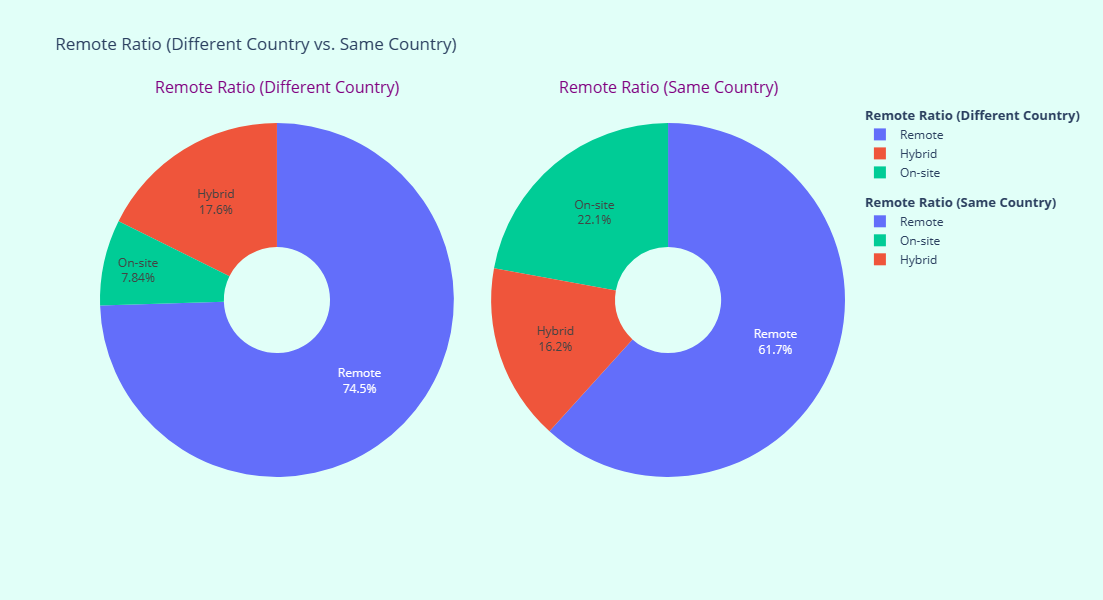

In [83]:
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], 
                    subplot_titles=("Plot 1", "Plot 2"),
                    vertical_spacing = 0.15,
                    horizontal_spacing = 0.05)

fig.add_trace(go.Pie(labels=data[data['employee_residence'] != data['company_location']].remote_ratio.value_counts().index, 
                     values=data[data['employee_residence'] != data['company_location']].remote_ratio.value_counts().values,  
                     name="Remote Ratio",
                     legendgroup="Remote Ratio (Different Country)",
                     legendgrouptitle_text=f'<b>Remote Ratio (Different Country)</b>'),
              1, 1)


fig.add_trace(go.Pie(labels=data[data['employee_residence'] == data['company_location']].remote_ratio.value_counts().index,
                     values=data[data['employee_residence'] == data['company_location']].remote_ratio.value_counts().values,
                     name="Remote Ratio",
                     legendgroup="Remote Ratio (Same Country)",
                     legendgrouptitle_text=f'<b>Remote Ratio (Same Country)</b>'),
              1, 2)


# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.30, textposition='inside', hoverinfo='percent+label+name', textinfo='percent+label')

fig.update_layout(
    title_text="Remote Ratio (Different Country vs. Same Country)",
    uniformtext_minsize = 10, 
    uniformtext_mode ='hide',
    height = 600,
    margin={"l": 100, "r": 100, "t": 100, "b": 100},
    paper_bgcolor="rgb(225, 255, 248)"
    # Add annotations in the center of the donut pies.
    #annotations=[dict(text='GHG', x=0.21, y=0.5, font_size=20, showarrow=False),
                 #dict(text='CO2', x=0.79, y=0.5, font_size=20, showarrow=False)]
)

names = {'Plot 1':'Remote Ratio (Different Country)', 'Plot 2':'Remote Ratio (Same Country)'}

# fig.for_each_annotation(lambda a: a.update(text = names[a.text]))

fig.for_each_annotation(lambda a: a.update(text = names[a.text]))
fig.update_annotations(font_size=16, font_color = 'Purple')
fig.show()

<p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">In my opinion, this chart is quite interesting because the rates of remote ratios are shown here, taking into account the country where the employee is located. The graph on the right shows the ratio of remote when the employee works in a company in the country where she/he lives. The graph on the left is the situation where the location of the employee and the location of the company are in different countries. The fact that the ratio in the right graph is relatively lower is quite expected, since it is so predictable that the ratio of remote is lower for those working in their home country. </p>

<p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">However, although the graphic on the left indicates that the company is located in different countries, there are some employees who appear to be hybrid or on-site. This is rather bizarre because if a person lives in India and works for a US based company, it is impossible to do this without working remotely. Yet, this may be possible if the company has an office in India or if the employee's official residence is in India but resides in the USA. Otherwise, there is a possible typo.</p>

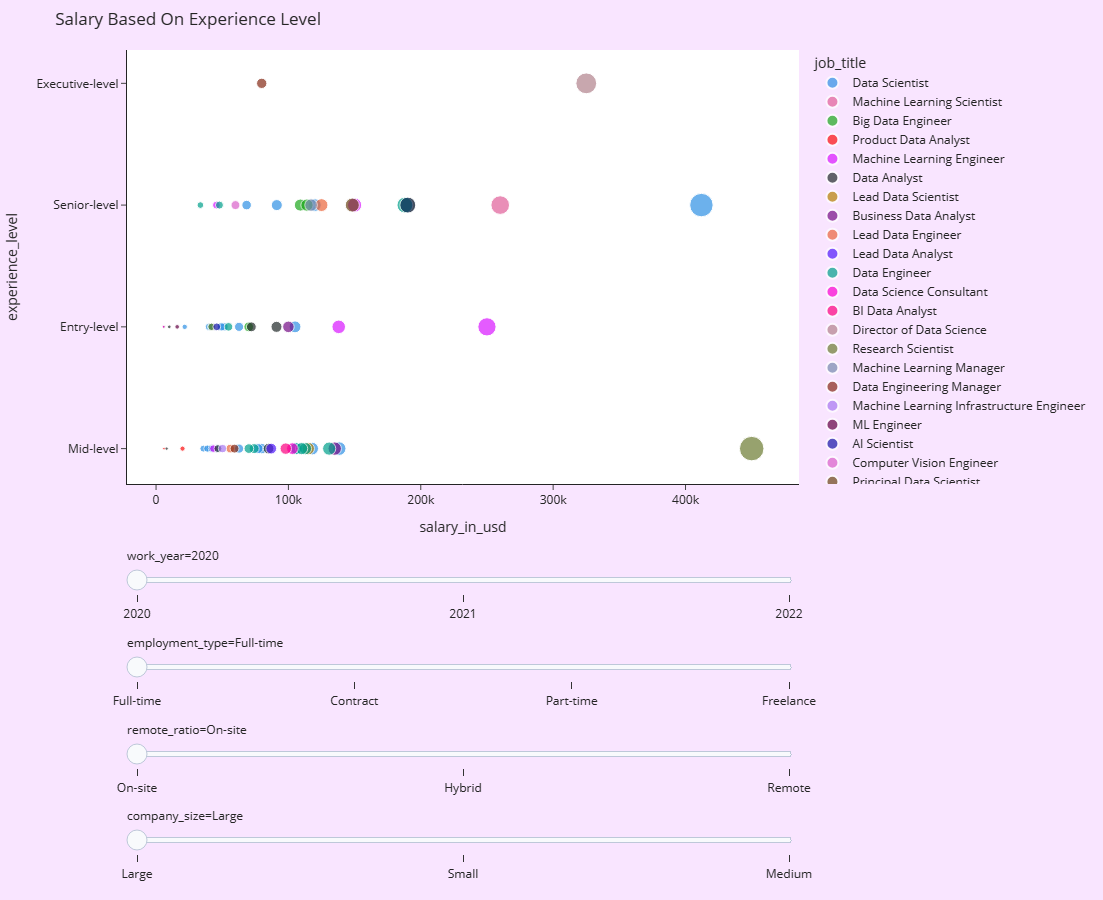

In [84]:
figs = [
    px.scatter(
        data,
        x="salary_in_usd",
        y="experience_level",
        animation_frame=ac,
        size = 'salary_in_usd', 
        hover_name = 'job_title', 
        color = 'job_title', 
        color_discrete_sequence=px.colors.qualitative.Dark24, 
        template = 'simple_white',
        title="Salary Based On Experience Level"
    )
    # columns that become sliders
    for ac in ["work_year", "employment_type", "remote_ratio", "company_size"]
]

# extract frames and sliders from each of the animated figures
layout = figs[0].to_dict()["layout"]
layout.pop("updatemenus") # don't want play and pause buttons
layout["sliders"] = []
frames = []
for i, f in enumerate(figs):
    slider = f.to_dict()["layout"]["sliders"]
    slider[0]["y"] = -0.2 * i
    slider[0]["x"] = 0
    slider[0]["len"] = 1

    layout["sliders"] += slider
    frames += f.frames

# finally build the figure with multiple sliders
go.Figure(data=figs[0].data, frames=frames, layout=layout).update_layout(
    margin={"l": 30, "r": 100, "t": 50, "b": 50}, height = 900, paper_bgcolor="#F9E5FF"
)

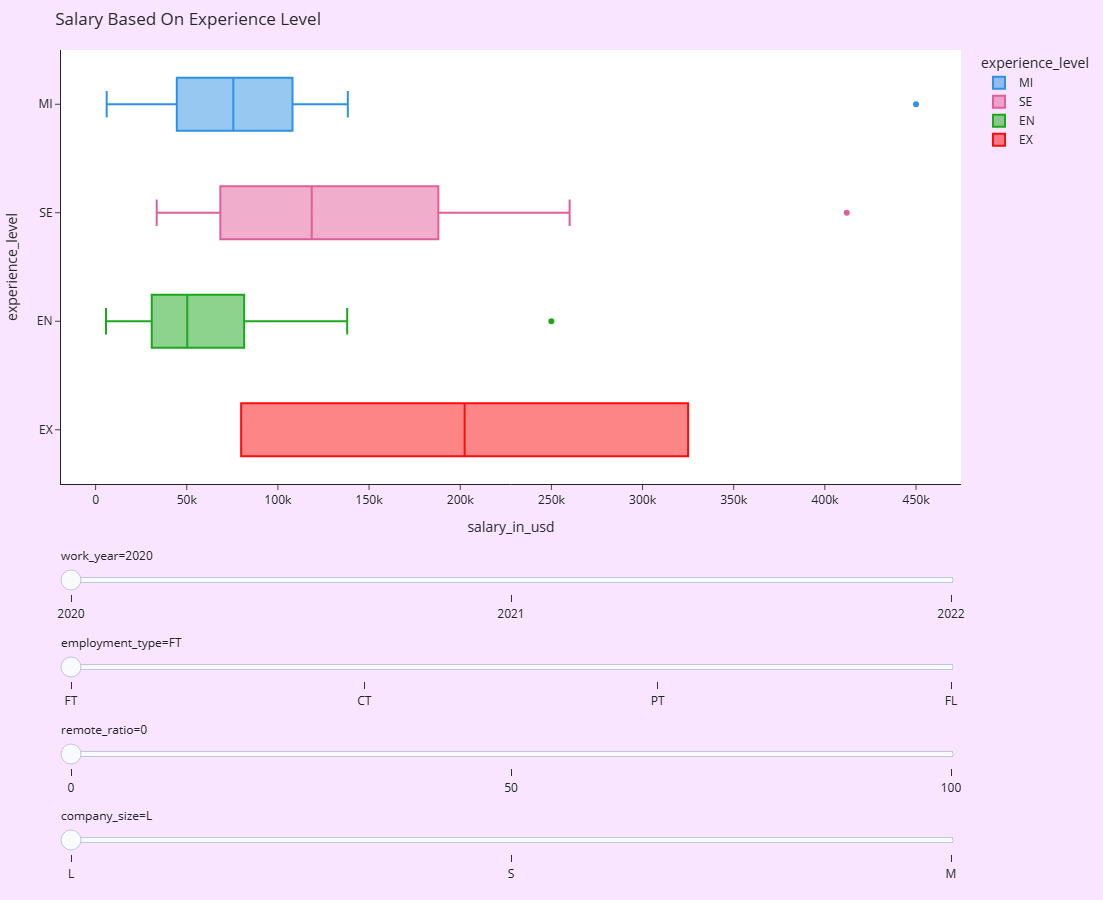

In [112]:
figs = [
    px.box(
        data,
        x="salary_in_usd",
        y="experience_level",
        animation_frame=ac,
        #size = 'salary_in_usd', 
        hover_name = 'experience_level', 
        color = 'experience_level', 
        color_discrete_sequence=px.colors.qualitative.Dark24, 
        template = 'simple_white',
        title="Salary Based On Experience Level",
    )
    # columns that become sliders
    for ac in ["work_year", "employment_type",  "remote_ratio", "company_size"]
]

# extract frames and sliders from each of the animated figures
layout = figs[0].to_dict()["layout"]
layout.pop("updatemenus") # don't want play and pause buttons
layout["sliders"] = []
frames = []
for i, f in enumerate(figs):
    slider = f.to_dict()["layout"]["sliders"]
    slider[0]["y"] = -0.2 * i
    slider[0]["x"] = 0
    slider[0]["len"] = 1

    layout["sliders"] += slider
    frames += f.frames
    
# Change grid color and axis colors
go.Figure(data=figs[0].data, frames=frames, layout=layout).update_xaxes(showline=True, linewidth=5, linecolor='black', gridcolor='Black')
go.Figure(data=figs[0].data, frames=frames, layout=layout).update_yaxes(showline=True, linewidth=5, linecolor='black', gridcolor='Black')

# finally build the figure with multiple sliders
go.Figure(data=figs[0].data, frames=frames, layout=layout).update_layout(
    margin={"l": 30, "r": 100, "t": 50, "b": 50}, height = 900, paper_bgcolor="#F9E5FF"
)


In [86]:
figs = [
    px.box(
        data,
        x="salary_in_usd",
        y="job_type",
        animation_frame=ac,
        #size = 'salary_in_usd', 
        hover_name = 'job_type', 
        color = 'job_type', 
        color_discrete_sequence=px.colors.qualitative.Dark24, 
        template = 'simple_white',
        title="Salary Based On Job Type",
    )
    # columns that become sliders
    for ac in ["work_year", "employment_type",  "remote_ratio", "company_size"]
]

# extract frames and sliders from each of the animated figures
layout = figs[0].to_dict()["layout"]
layout.pop("updatemenus") # don't want play and pause buttons
layout["sliders"] = []
frames = []
for i, f in enumerate(figs):
    slider = f.to_dict()["layout"]["sliders"]
    slider[0]["y"] = -0.2 * i
    slider[0]["x"] = 0
    slider[0]["len"] = 1

    layout["sliders"] += slider
    frames += f.frames
    
# Change grid color and axis colors
go.Figure(data=figs[0].data, frames=frames, layout=layout).update_xaxes(showline=True, linewidth=5, linecolor='black', gridcolor='Black')
go.Figure(data=figs[0].data, frames=frames, layout=layout).update_yaxes(showline=True, linewidth=5, linecolor='black', gridcolor='Black')

# finally build the figure with multiple sliders
go.Figure(data=figs[0].data, frames=frames, layout=layout).update_layout(
    margin={"l": 30, "r": 100, "t": 50, "b": 50}, height = 900, paper_bgcolor="#F9E5FF"
)


<p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">As can be seen from the graphics above, which are used by more than one slider, it can be understood that the employees differ in terms of experience level and job type.</p>

[back to top](#table-of-contents)
<a id="stats"></a>
# <p style="background-color:#3a2c57; font-family:newtimeroman; font-size:150%; text-align:center">4. Statistical Analysis</p>

<p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">This section will focus on the secondary ultimate purpose of the notebook. For this, first of all, the assumptions of ANOVA analysis will be examined.</p>


* <p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">Your dependent variable should be measured at the interval or ratio level. Namely, it must be continuous.</p>
* <p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">Your independent variable should consist of two or more categorical, independent groups.</p>
* <p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">You should have independence of observations, which means that there is no relationship between the observations in each group or between the groups themselves.</p>
* <p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">Your dependent variable should be approximately normally distributed for each category of the independent variable.</p>
* <p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">There needs to be homogeneity of variances (Homoscedasticity).</p>

<a id="normality"></a>
## <p style="background-color:#664e99; font-family:newtimeroman; font-size:120%; text-align:center">4.1. Normality Check</p>

<p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">The assumption of normality is our most critical assumption in this data set in order to perform ANOVA because it is obvious that the observations in the data are independent from each other. In addition, since the issue of equality of variance is robust, there is no harm in applying ANOVA in cases where the variances are not exaggeratedly different (Rule of thumb: The situation where the variance of one group is not more than 4 times the variance of the other group). This will be discussed again below.</p>

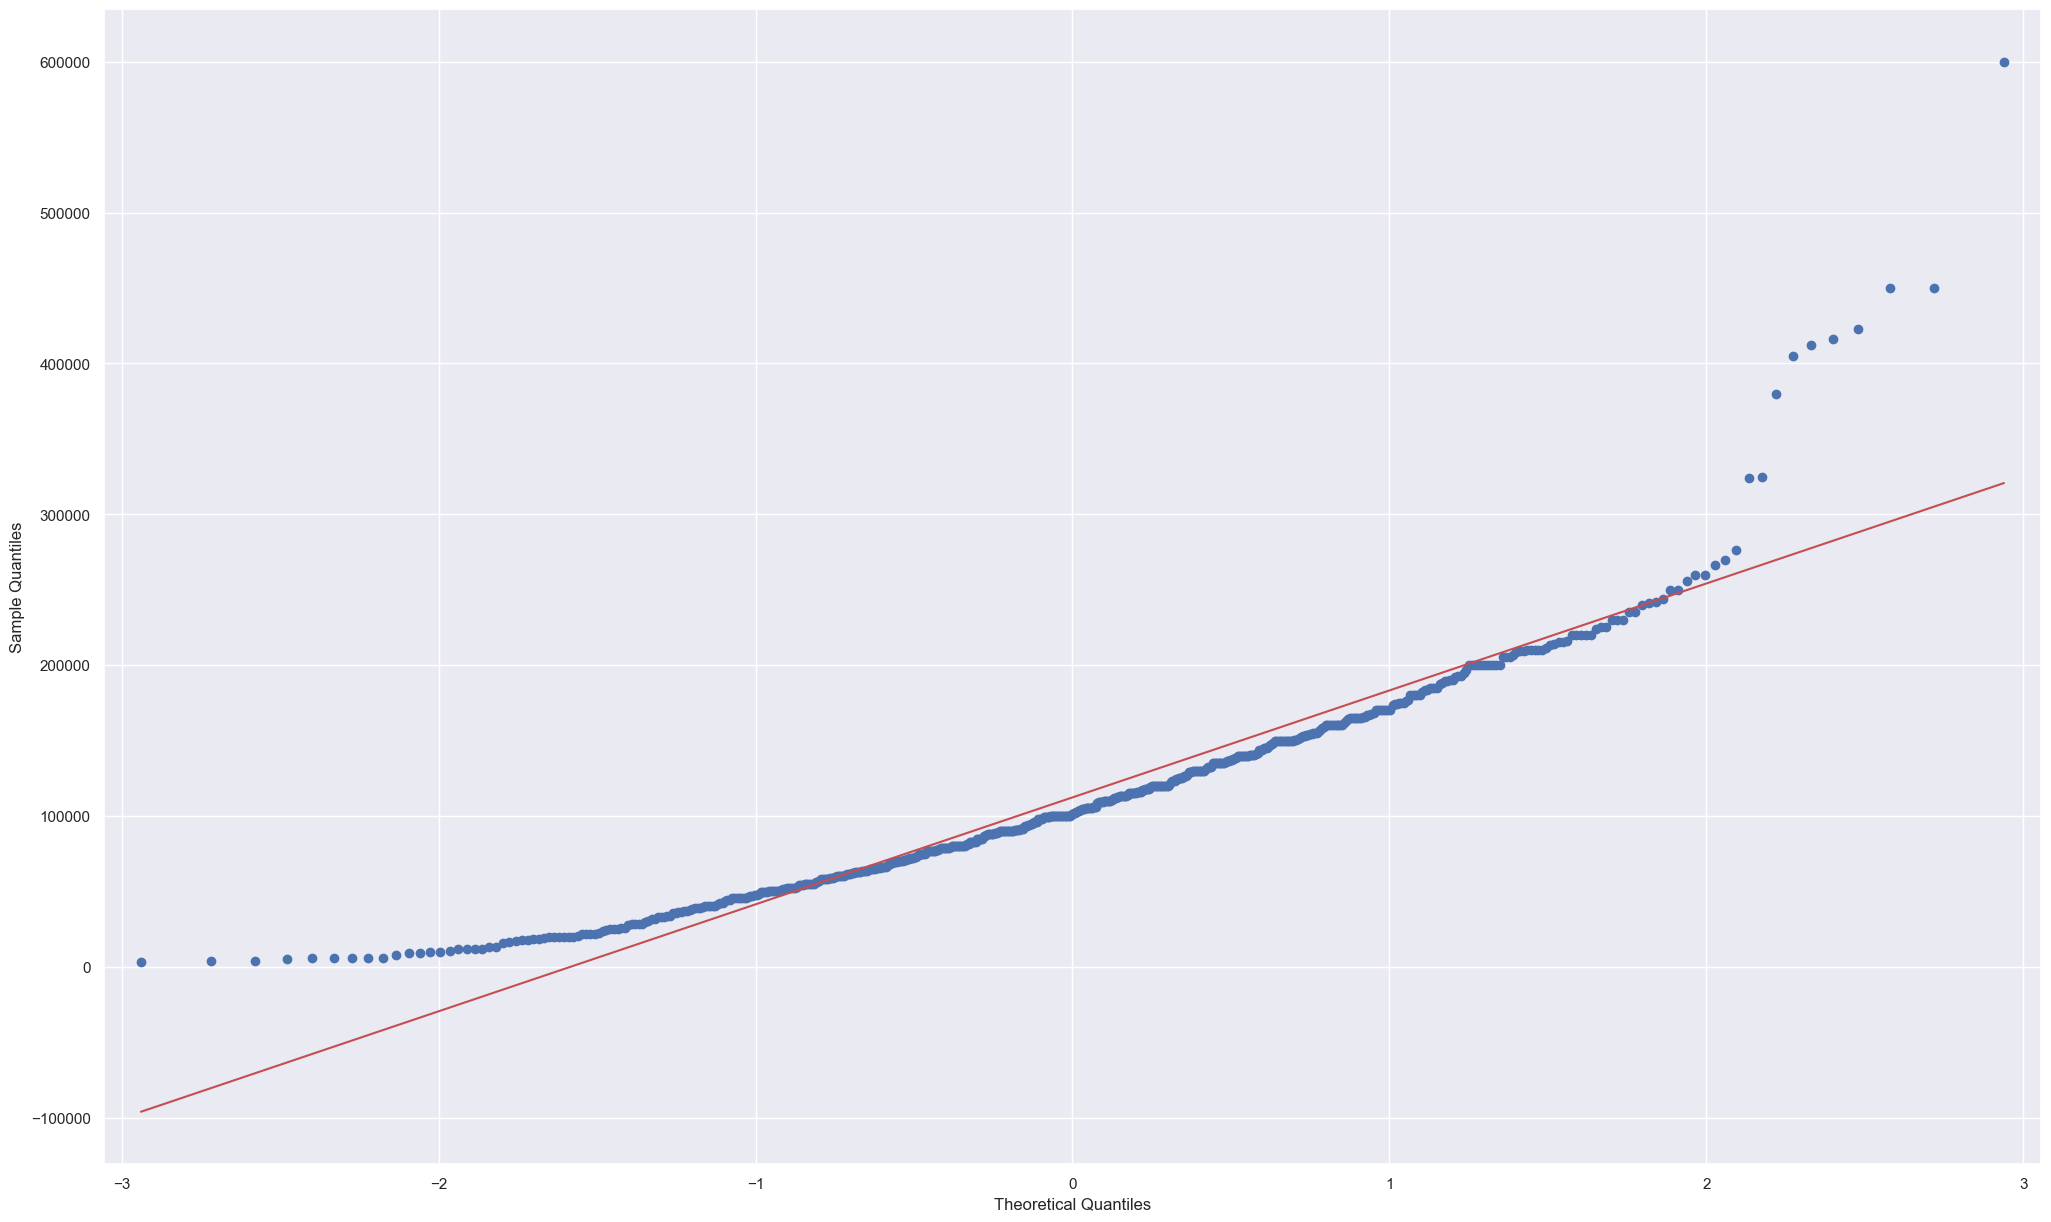

In [87]:
qqplot_data = qqplot(data['salary_in_usd'], line='s').gca().lines

In [88]:
fig = go.Figure()

fig.add_trace({
    'type': 'scatter',
    'x': qqplot_data[0].get_xdata(),
    'y': qqplot_data[0].get_ydata(),
    'mode': 'markers',
    'marker': {
        'color': '#19d3f3'
    }
})

fig.add_trace({
    'type': 'scatter',
    'x': qqplot_data[1].get_xdata(),
    'y': qqplot_data[1].get_ydata(),
    'mode': 'lines',
    'line': {
        'color': '#636efa'
    }

})


fig['layout'].update({
    'title': 'Quantile-Quantile Plot',
    'xaxis': {
        'title': 'Theoritical Quantities',
        'zeroline': False
    },
    'yaxis': {
        'title': 'Sample Quantities'
    },
    'showlegend': False,
    'width': 1000,
    'height': 600,
})


fig.show()

In [89]:
fig = px.box(data, y="salary_in_usd", points="all", width=750, height=750)
fig.show()

<p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">It is seen from the qq and box plots that the dependent variable salary is not normally distributed. The shapiro-wilk and D'Agostino and Pearson's tests will still be applied.</p>

In [90]:
stat, p = shapiro(data['salary_in_usd'])

# interpret
alpha = 0.05
if p > alpha:
    msg = 'Sample looks Gaussian (fail to reject H0)'
else:
    msg = 'Sample does not look Gaussian (reject H0)'

result_mat = [
    ['Length of the sample data', 'Test Statistic', 'p-value', 'Comments'],
    [len(data['salary_in_usd']), stat, p, msg]
]

swt_table = ff.create_table(result_mat)
swt_table['data'][0].colorscale=[[0, '#7A2DD1'],[1, '#ffffff']]
swt_table['layout']['height']=200
swt_table['layout']['width']=1200
swt_table['layout']['margin']['t']=50
swt_table['layout']['margin']['b']=50

swt_table.show()

In [91]:
stat, p = normaltest(data['salary_in_usd'])

# interpret
alpha = 0.05
if p > alpha:
    msg = 'Sample looks Gaussian (fail to reject H0)'
else:
    msg = 'Sample does not look Gaussian (reject H0)'

result_mat = [
    ['Length of the sample data', 'Test Statistic', 'p-value', 'Comments'],
    [len(data['salary_in_usd']), stat, p, msg]
]

normt_table = ff.create_table(result_mat)
normt_table['data'][0].colorscale=[[0, '#7A2DD1'],[1, '#ffffff']]
normt_table['layout']['height']=200
normt_table['layout']['width']=1200
normt_table['layout']['margin']['t']=50
normt_table['layout']['margin']['b']=50

normt_table.show()

<p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">In fact, the data does not necessarily need to be normalised in order to continue the analysis. In such cases, non-parametric tests can be preferred instead of ANOVA. The Kruskal-Wallis test is the non-parametric conjugate of ANOVA. Non-parametric tests can be applied when the data does not conform to the normality assumption. However, ANOVA technique will be applied by normalising the data with the box-cox transformation.</p>

In [92]:
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(np.log(data['salary_in_usd']))
data['transformed_salary_in_usd']=pd.Series(fitted_data)

In [93]:
fig = go.Figure()
fig.add_trace(go.Box(x=data["salary_in_usd"], name = 'salary_in_usd'))
fig.add_trace(go.Box(x=data["transformed_salary_in_usd"], name = 'transformed_salary_in_usd'))

fig.show()

In [94]:
stat, p = normaltest(data['transformed_salary_in_usd'])

# interpret
alpha = 0.05
if p > alpha:
    msg = 'Sample looks Gaussian (fail to reject H0)'
else:
    msg = 'Sample does not look Gaussian (reject H0)'

result_mat = [
    ['Length of the sample data', 'Test Statistic', 'p-value', 'Comments'],
    [len(data['transformed_salary_in_usd']), stat, p, msg]
]

normt_table = ff.create_table(result_mat)
normt_table['data'][0].colorscale=[[0, '#7A2DD1'],[1, '#ffffff']]
normt_table['layout']['height']=200
normt_table['layout']['width']=1200
normt_table['layout']['margin']['t']=50
normt_table['layout']['margin']['b']=50

normt_table.show()

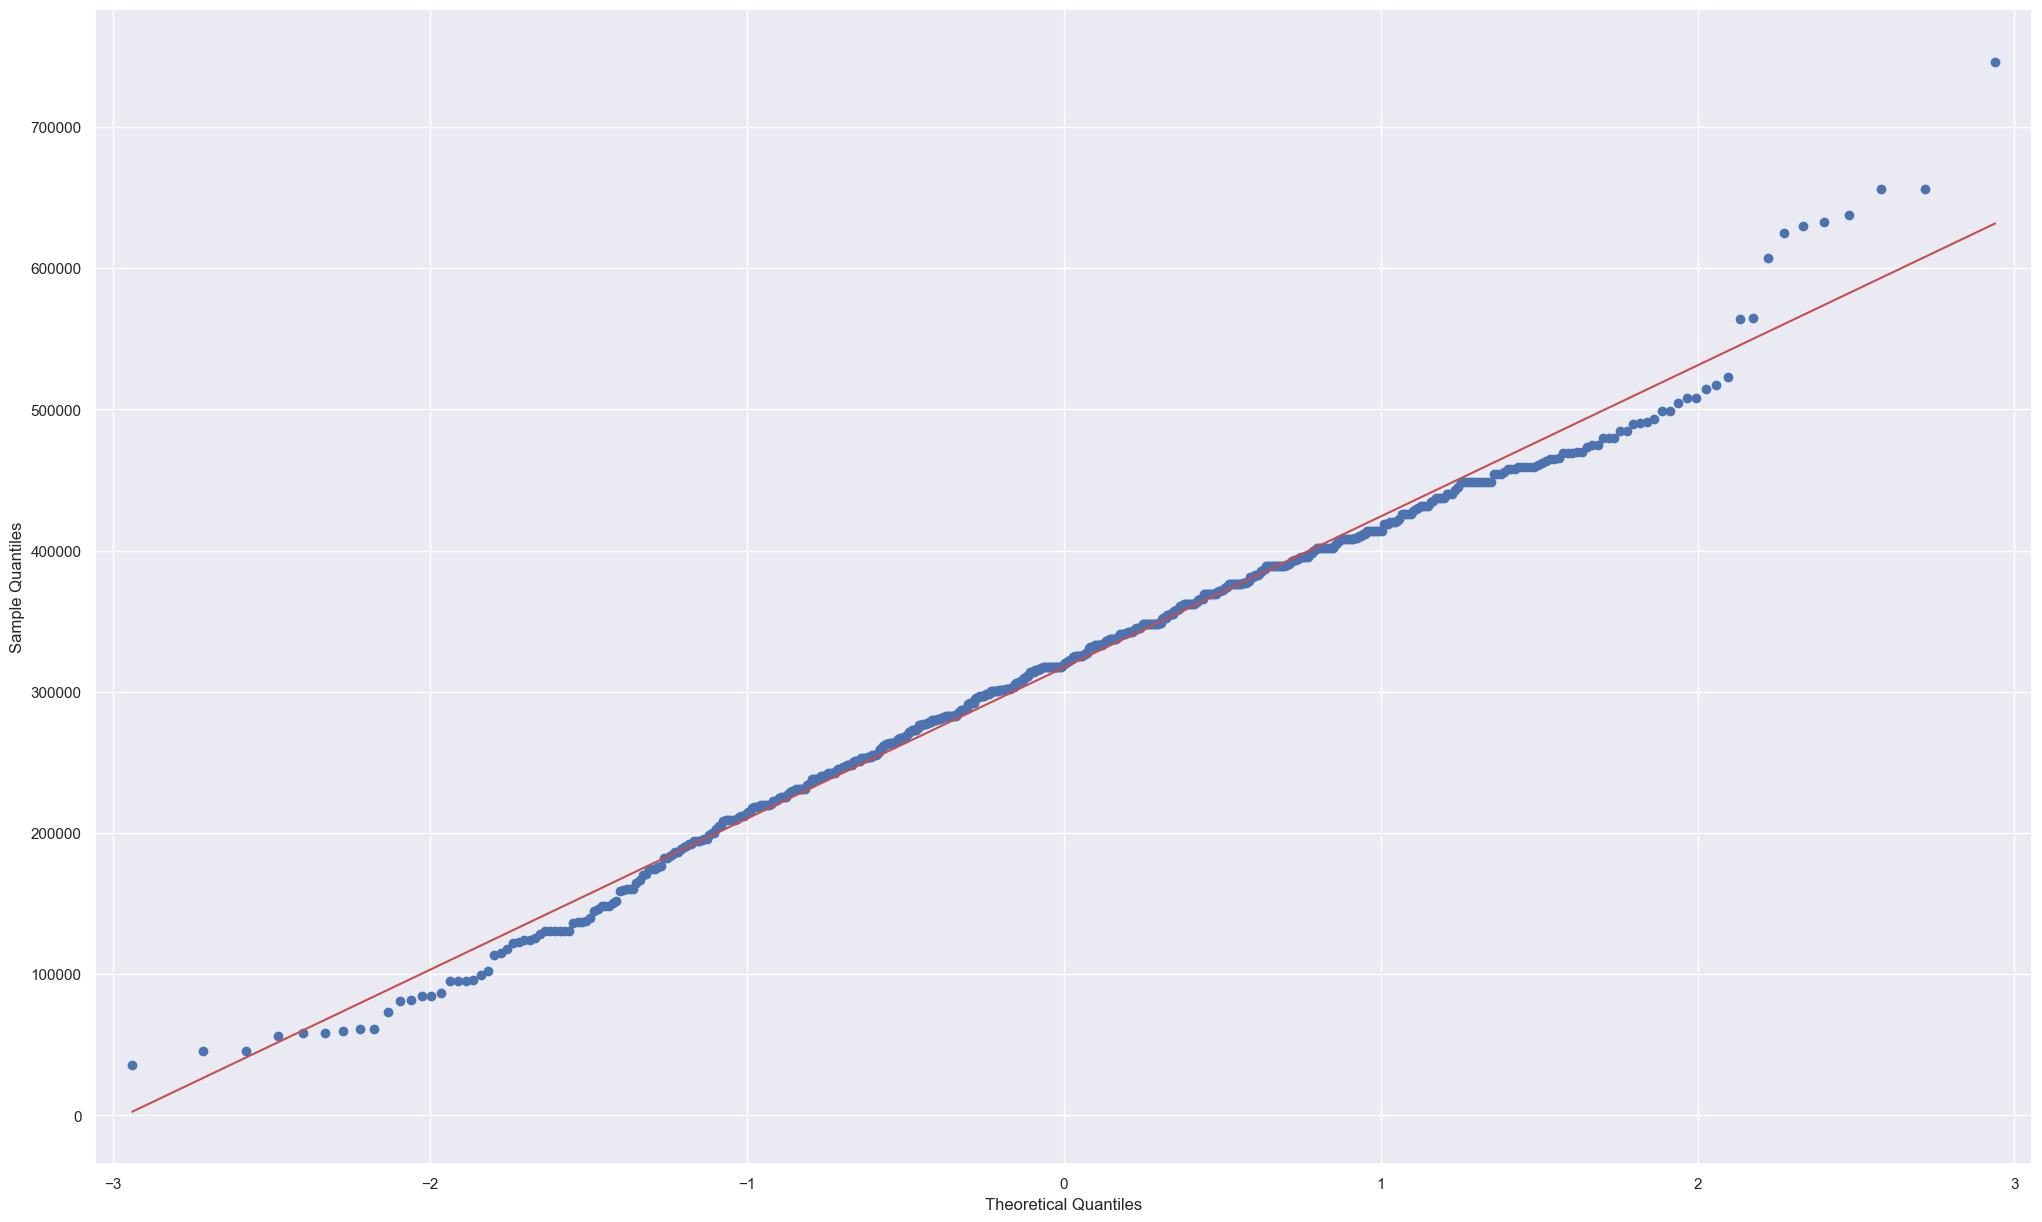

In [95]:
qqplot_data = qqplot(data['transformed_salary_in_usd'], line='s').gca().lines

In [96]:
fig = go.Figure()

fig.add_trace({
    'type': 'scatter',
    'x': qqplot_data[0].get_xdata(),
    'y': qqplot_data[0].get_ydata(),
    'mode': 'markers',
    'marker': {
        'color': '#19d3f3'
    }
})

fig.add_trace({
    'type': 'scatter',
    'x': qqplot_data[1].get_xdata(),
    'y': qqplot_data[1].get_ydata(),
    'mode': 'lines',
    'line': {
        'color': '#636efa'
    }

})


fig['layout'].update({
    'title': 'Quantile-Quantile Plot',
    'xaxis': {
        'title': 'Theoritical Quantities',
        'zeroline': False
    },
    'yaxis': {
        'title': 'Sample Quantities'
    },
    'showlegend': False,
    'width': 1000,
    'height': 600,
})


fig.show()

<p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">After the Box-cox transformation, it seems that the data converges more to the normal than before and passes the Shapiro-Wilk test. In this state, the ANOVA technique can be applied to the data.</p>

<a id="anova"></a>
## <p style="background-color:#664e99; font-family:newtimeroman; font-size:120%; text-align:center">4.2. ANOVA</p>

<Axes: xlabel='experience_level', ylabel='transformed_salary_in_usd'>

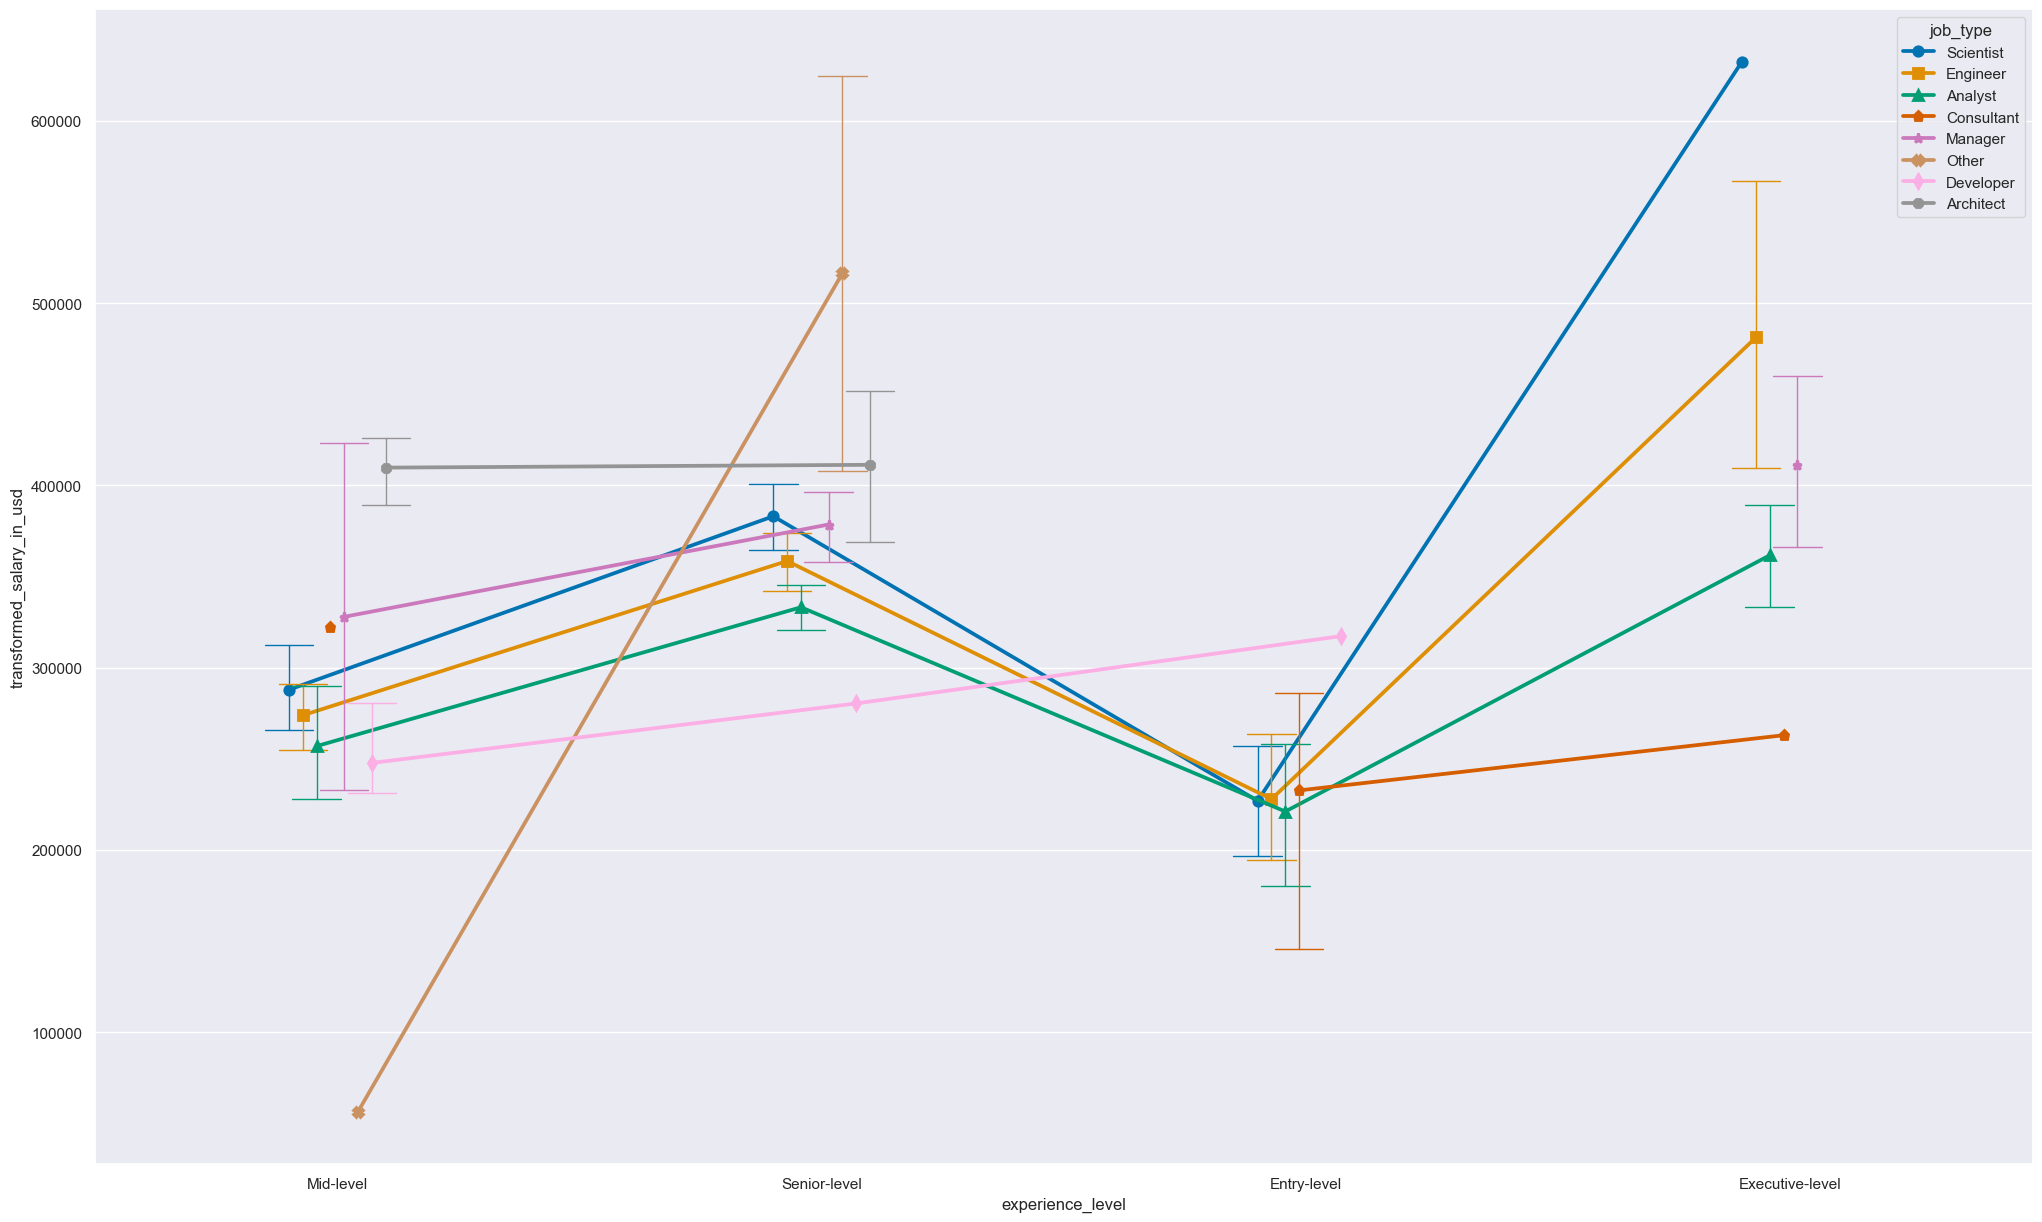

In [97]:
sns.set(rc={"figure.figsize":(25, 15)}) #width=8, height=4
sns.pointplot(data=data, x='experience_level', y='transformed_salary_in_usd', hue='job_type', dodge=True, markers=['o', 's', '^', 'p', '*', 'X', 'd', '8'],
	      capsize=.1, errwidth=1, palette='colorblind')

<p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">Job type and experience level, which are probably the most striking variables in the data set, were considered in order to serve as an example for ANOVA analysis in this notebook. They seem to differ from each other in the graph, and this actually gives a crucial clue that the groups will differ significantly in terms of means before the ANOVA test. Moreover, the fact that the curves in the graph intersect each other at more than one point, in other words, they do not show parallelism with each other, indicates the interaction effect between the independent variables.</p>

<a id="two_way_anova"></a>
## <p style="background-color:#664e99; font-family:newtimeroman; font-size:100%; text-align:center">4.2.1. Two-Way ANOVA</p>

<p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">This is a bit of an ambiguity because how the sum of squares should be calculated is a bit of a debate. We mentioned in the graph above that there is a possible interaction effect between the variables. In this direction, it would be more appropriate to use a type III model because this type tests for the presence of a main effect after the other main effect and interaction. This approach is therefore valid in the presence of significant interactions.</p>

* <p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">SS(A|B,A*B)</p>
* <p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">SS(B|A,A*B)</p>
* <p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">SS(A*B|A,B)</p>

In [98]:
## perform two-way ANOVA

model = ols('transformed_salary_in_usd ~ C(job_type) + C(experience_level) + C(job_type):C(experience_level)', data = data).fit()
sm.stats.anova_lm(model, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,"830,624,535,383.340",1.000,106.956,0.000
C(job_type),"151,177,739,100.985",7.000,2.781,0.007
C(experience_level),"248,685,867,048.942",3.000,10.674,0.000
C(job_type):C(experience_level),"464,092,367,926.899",21.000,2.846,0.000
Residual,"4,519,818,418,189.437",582.000,NaN,NaN


<a id="variance"></a>
## <p style="background-color:#664e99; font-family:newtimeroman; font-size:100%; text-align:center">4.2.2. Variance Homogenity</p>

<p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">Since Python does not work like SPSS, we cannot perform variance analysis simultaneously with ANOVA analysis. It is possible to analyze variance before or after. The following Levene test checks for variance equality and its hypotheses are:</p>

<p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">H0: σ21=σ22=…=σ2k</p>
<p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">Ha: σ2i≠σ2j  for at least one pair (i,j).</p>

<p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">That is, the null hypothesis for Levene's is that the variances are equal across all samples.</p>

In [99]:
Analyst = data[data['job_type']=='Analyst']['transformed_salary_in_usd']
Architect = data[data['job_type']=='Architect']['transformed_salary_in_usd']
Consultant = data[data['job_type']=='Consultant']['transformed_salary_in_usd']
Developer = data[data['job_type']=='Developer']['transformed_salary_in_usd']
Engineer = data[data['job_type']=='Engineer']['transformed_salary_in_usd']
Manager = data[data['job_type']=='Manager']['transformed_salary_in_usd']
Scientist = data[data['job_type']=='Scientist']['transformed_salary_in_usd']
Other = data[data['job_type']=='Other']['transformed_salary_in_usd']

stat_jobtype, p_value_jobtype = levene(Analyst, Architect, Consultant, Developer, Engineer, Manager, Scientist, Other, center='median')
print('Job type levene test:', stat_jobtype, p_value_jobtype)

Midlevel = data[data['experience_level']=='Mid-level']['transformed_salary_in_usd']
Seniorlevel = data[data['experience_level']=='Senior-level']['transformed_salary_in_usd']
Entrylevel = data[data['experience_level']=='Entry-level']['transformed_salary_in_usd']
Executivelevel = data[data['experience_level']=='Executive-level']['transformed_salary_in_usd']

stat_experiencelevel, p_value_experiencelevel = levene(Midlevel, Seniorlevel, Entrylevel, Executivelevel, center='median')
print('Experience level levene test:', stat_experiencelevel, p_value_experiencelevel)

Job type levene test: 4.959256928705479 1.8090713632781467e-05
Experience level levene test: 3.8973152072436372 0.00892969583513017


<p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">As can be seen from the test, at least for the job type variable, the variances between the groups are not equal, which leads us to the tests that should be applied when the variances are not equal when performing post-hoc tests.</p>

<a id="post_hoc"></a>
## <p style="background-color:#664e99; font-family:newtimeroman; font-size:100%; text-align:center">4.2.3. Post-Hoc Tests</p>

In [100]:
# perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=data['transformed_salary_in_usd'],
                          groups=data['job_type'],
                          alpha=0.01)
print(tukey)

           Multiple Comparison of Means - Tukey HSD, FWER=0.01           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
   Analyst  Architect  119330.4736 0.0043    7275.2446 231385.7025   True
   Analyst Consultant   -41839.208 0.9697 -185726.8034 102048.3875  False
   Analyst  Developer  -23422.8489 0.9997 -192316.3516 145470.6539  False
   Analyst   Engineer   22582.6293 0.5473  -19417.2192  64582.4779  False
   Analyst    Manager   90887.7324    0.0   25611.5771 156163.8876   True
   Analyst      Other   71539.5909 0.9395 -144735.4439 287814.6256  False
   Analyst  Scientist   26948.1456 0.3427  -16130.1395  70026.4307  False
 Architect Consultant -161169.6815 0.0269 -337123.1129  14783.7498  False
 Architect  Developer -142753.3224 0.1692 -339682.2059  54175.5611  False
 Architect   Engineer  -96747.8442 0.0388 -206383.4094   12887.721  False
 Architect    Manager  -28442.7412 0.9

In [101]:
# perform Scheffe test
sp.posthoc_scheffe(data, val_col='transformed_salary_in_usd', group_col='job_type')

,Scientist,Engineer,Analyst,Consultant,Manager,Other,Developer,Architect
Scientist,1.000,1.000,0.670,0.891,0.064,0.999,0.992,0.265
Engineer,1.000,1.000,0.821,0.920,0.029,0.999,0.996,0.203
Analyst,0.670,0.821,1.000,0.994,0.001,0.986,1.000,0.049
Consultant,0.891,0.920,0.994,1.000,0.205,0.928,1.000,0.162
Manager,0.064,0.029,0.001,0.205,1.000,1.000,0.613,0.998
Other,0.999,0.999,0.986,0.928,1.000,1.000,0.980,0.999
Developer,0.992,0.996,1.000,1.000,0.613,0.980,1.000,0.472
Architect,0.265,0.203,0.049,0.162,0.998,0.999,0.472,1.000


In [102]:
# perform Bonferroni test
sp.posthoc_conover(data, val_col='transformed_salary_in_usd', group_col='job_type', p_adjust = 'bonferroni')

,Analyst,Architect,Consultant,Developer,Engineer,Manager,Other,Scientist
Analyst,1.000,0.001,1.000,1.000,0.931,0.000,1.000,0.399
Architect,0.001,1.000,0.009,0.048,0.012,1.000,1.000,0.022
Consultant,1.000,0.009,1.000,1.000,1.000,0.017,1.000,1.000
Developer,1.000,0.048,1.000,1.000,1.000,0.114,1.000,1.000
Engineer,0.931,0.012,1.000,1.000,1.000,0.000,1.000,1.000
Manager,0.000,1.000,0.017,0.114,0.000,1.000,1.000,0.001
Other,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
Scientist,0.399,0.022,1.000,1.000,1.000,0.001,1.000,1.000


<p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">As an example, Tukey HSD, Bonferroni and Scheffe tests applied in case of equality of variance were performed. According to these tests, it seems that those working as managers (and also architects for some job types) differ statistically significantly in terms of the salary earned from other employees. But let's also take a look at Tamhane's T2 test.</p>

In [103]:
# perform Tamhane's T2 test

sp.posthoc_tamhane(data, val_col='transformed_salary_in_usd', group_col='job_type')

,Scientist,Engineer,Analyst,Consultant,Manager,Other,Developer,Architect
Scientist,1.000,1.000,0.160,0.509,0.000,1.000,0.232,0.001
Engineer,1.000,1.000,0.268,0.575,0.000,1.000,0.308,0.001
Analyst,0.160,0.268,1.000,0.911,0.000,1.000,0.898,0.000
Consultant,0.509,0.575,0.911,1.000,0.047,0.999,1.000,0.014
Manager,0.000,0.000,0.000,0.047,1.000,1.000,0.003,0.813
Other,1.000,1.000,1.000,0.999,1.000,1.000,1.000,1.000
Developer,0.232,0.308,0.898,1.000,0.003,1.000,1.000,0.000
Architect,0.001,0.001,0.000,0.014,0.813,1.000,0.000,1.000


<p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">Tamhane's T2 test, which was used when the variances were not equal, also did not say anything different. Managers differ statistically significantly from other employees.</p>

<a id="welch_anova"></a>
## <p style="background-color:#664e99; font-family:newtimeroman; font-size:100%; text-align:center">4.2.4. Welch ANOVA</p>

<p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">One of the guarantee methods that can be applied in cases where the variances are not equal is the use of Welch ANOVA, which calculates the degrees of freedom in proportion to the number of observations of the groups. However, Welch ANOVA is available in the pingouin library and only works for one-way ANOVA. In other words, it allows the use of only one independent variable. However, as an example, this analysis is as follows.</p>

In [104]:
pg.welch_anova(dv='transformed_salary_in_usd', between='job_type', data=data)

,Source,ddof1,ddof2,F,p-unc,np2
0,job_type,7,21.126,9.968,0.000,0.061


In [105]:
pg.pairwise_gameshowell(dv='transformed_salary_in_usd', between='job_type', data=data)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Analyst,Architect,"291,578.406","410,908.879","-119,330.474","19,258.443",-6.196,16.351,0.000,-1.357
1,Analyst,Consultant,"291,578.406","249,739.198","41,839.208","34,099.947",1.227,6.760,0.899,0.465
2,Analyst,Developer,"291,578.406","268,155.557","23,422.849","18,386.250",1.274,6.226,0.881,0.264
3,Analyst,Engineer,"291,578.406","314,161.035","-22,582.629","10,848.962",-2.082,277.733,0.429,-0.224
4,Analyst,Manager,"291,578.406","382,466.138","-90,887.732","14,275.356",-6.367,88.135,0.000,-1.046
5,Analyst,Other,"291,578.406","363,117.997","-71,539.591","165,841.292",-0.431,2.010,0.999,-0.739
6,Analyst,Scientist,"291,578.406","318,526.551","-26,948.146","11,666.793",-2.310,294.299,0.292,-0.253
7,Architect,Consultant,"410,908.879","249,739.198","161,169.682","37,402.368",4.309,9.392,0.025,2.164
8,Architect,Developer,"410,908.879","268,155.557","142,753.322","23,962.156",5.957,12.352,0.001,2.461
9,Architect,Engineer,"410,908.879","314,161.035","96,747.844","18,810.387",5.143,14.930,0.002,0.925


<p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">The Games-Howell test, a substitute for Tamhane's T2 test, is used here for post-hoc. Again, nothing has changed. Managers - and to some extent architects - differ from other jobs.</p>

<a id="kruskal_wallis"></a>
## <p style="background-color:#664e99; font-family:newtimeroman; font-size:100%; text-align:center">4.2.5. Kruskal-Wallis Test</p>

In [106]:
stats.kruskal(data[data['experience_level'] == 'Mid-level']['salary_in_usd'], data[data['experience_level'] == 'Senior-level']['salary_in_usd'], data[data['experience_level'] == 'Entry-level']['salary_in_usd'], data[data['experience_level'] == 'Executive-level']['salary_in_usd'])

KruskalResult(statistic=190.11051690522282, pvalue=5.777441885479927e-41)

<p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(26, 26, 26)">Finally, the Kruskal-Wallis test was used as an example. Untransformed salary data is used as this does not require the assumption of normality. Using the experience level variable, it was checked whether the groups differed from each other in a statistically significant way and it was concluded that they differed statistically.</p>

p style="font-family:newtimeroman; margin-bottom:2px; font-size:18px; color: rgb(200, 100, 100)">Conclusion: Some important information, especially ANOVA, is given. In order for this notebook not to be too information-intensive, I have briefly explained the statistical information, but if anyone wants additional information, please comment. I can suggest resources to them.</p>